In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import ensemble
from sklearn import metrics

df = pd.read_csv("https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv")

numrows = 25549

RF_df = pd.DataFrame({'four_days_ago' : [0.0]*numrows,
                      'three_days_ago' : [0.0]*numrows,
                      'two_days_ago' : [0.0]*numrows,
                      'yesterday' : [0.0]*numrows,
                      'today' : [0.0]*numrows,
                                "tomorrow" : [True]*numrows})

seq = ["four_days_ago",
       "three_days_ago",
       "two_days_ago",
       "yesterday",
       "today",
      "tomorrow"]

RF_df = RF_df.reindex(columns=seq)

for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    yesterday = df.iloc[(i-2),1]
    two_days_ago = df.iloc[(i-3),1]
    three_days_ago = df.iloc[(i-4),1]
    four_days_ago = df.iloc[(i-5),1]
    RF_df.iat[i,5] = tomorrow
    RF_df.iat[i,4] = today
    RF_df.iat[i,3] = yesterday
    RF_df.iat[i,2] = two_days_ago
    RF_df.iat[i,1] = three_days_ago
    RF_df.iat[i,0] = four_days_ago
    
RF_df = RF_df.dropna()

In [56]:
RF_df.head()

,four_days_ago,three_days_ago,two_days_ago,yesterday,today,tomorrow
0,0.0,0.00,0.00,0.00,0.00,True
1,0.0,0.00,0.00,0.00,0.47,True
2,0.0,0.00,0.00,0.47,0.59,True
3,0.0,0.00,0.47,0.59,0.42,True
4,0.0,0.47,0.59,0.42,0.31,True


In [57]:
x = RF_df.today.values
y = RF_df.tomorrow.values
x = x.reshape(RF_df.shape[0],1)

In [62]:
clf = ensemble.RandomForestClassifier(n_estimators=10).fit(x, y)

In [63]:
score = clf.score(x,y)
print(score)

0.7129375832093351


In [64]:
predictions = clf.predict(x)
cm = metrics.confusion_matrix(y,predictions)
print(cm)

[[11448  3189]
 [ 4142  6759]]


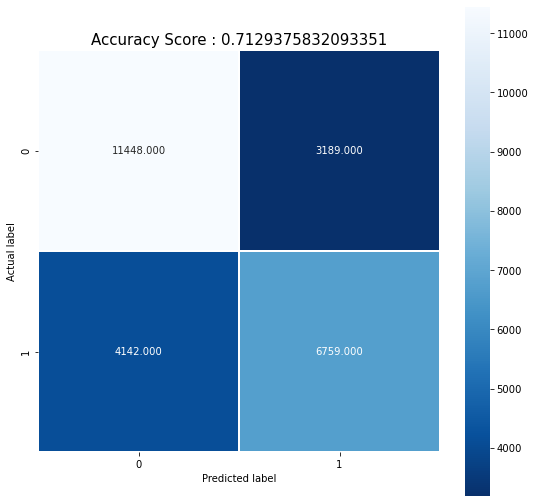

In [65]:
plt.figure(figsize=(9,9))
sns.heatmap(cm , annot=True , fmt=".3f" , linewidths=.5 , square = True , cmap = "Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label");
all_sample_title = "Accuracy Score : {0}".format(score)
plt.title(all_sample_title , size = 15);